# **About Dataset**
**Context**

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

**Content**
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

**Labels**

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


TL;DR

Each row is a separate image

Column 1 is the class label.

Remaining columns are pixel numbers (784 total).

Each value is the darkness of the pixel (1 to 255)


In [ ]:
# Importing all the Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
# Loading data
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
# Shape of data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
# Data type of dataset
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [ ]:
# creating validation data snd scaling data to range (0-1)

X_valid, X_train = X_train[:4000], X_train[4000:] / 255
y_valid, y_train = y_train[:4000], y_train[4000:]
X_test = X_test / 255

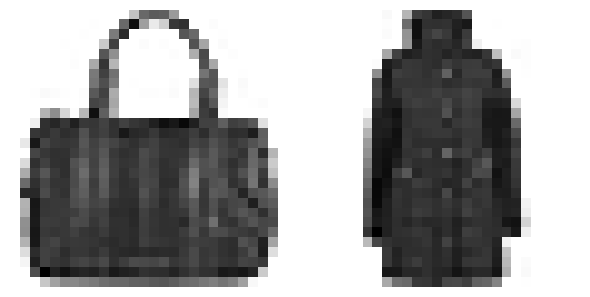

In [ ]:
# looking at first two images

plt.figure(figsize = (6, 4))
plotnumber = 1

for i in range(2):
    if plotnumber <= 2:
        ax = plt.subplot(1, 2, plotnumber)
        plt.imshow(X_train[i], cmap = 'binary')
        plt.axis('off')

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
y_train

array([8, 4, 3, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]], class_names[y_train[1]]

('Bag', 'Coat')

***Validation set contains 4,000 images, and the test set contains 10,000 images***

In [ ]:
X_valid.shape

(4000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

***Sample of the images in the dataset***

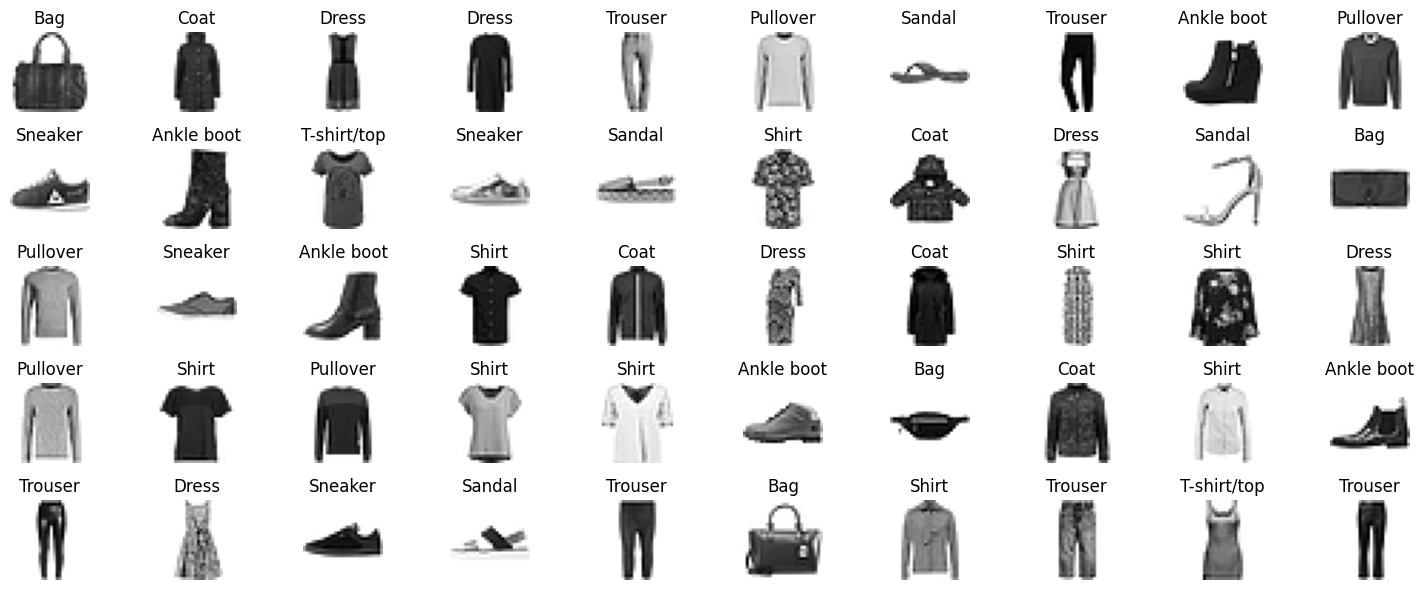

In [ ]:
plt.figure(figsize = (15, 6))
plotnumber = 1

for i in range(51):
    if plotnumber <= 50:
        ax = plt.subplot(5, 10, plotnumber)
        plt.imshow(X_train[i], cmap = 'binary')
        plt.axis('off')
        plt.title(class_names[y_train[i]], fontdict = {'fontsize'  : 12, 'color' : 'black'})

    plotnumber += 1

plt.tight_layout()
plt.show()

***Model Building***

In [ ]:
# Building sequential model

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
# summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 70)                7070      
                                                                 
 dense_2 (Dense)             (None, 50)                3550      
                                                                 
 dense_3 (Dense)             (None, 20)                1020      
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
Total params: 90350 (352.93 KB)
Trainable params: 90350 

***Compiling the Image Classification Model***

In [ ]:
# compiling model

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

***Training and Evaluating the Image Classification Model***

In [ ]:
# fitting model
model_history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 50)

Epoch 1/50
1750/1750 [==============================] - 9s 4ms/step - loss: 0.5251 - accuracy: 0.8145 - val_loss: 63.8045 - val_accuracy: 0.8265
Epoch 2/50
1750/1750 [==============================] - 7s 4ms/step - loss: 0.3797 - accuracy: 0.8604 - val_loss: 50.2539 - val_accuracy: 0.8475
Epoch 3/50
1750/1750 [==============================] - 7s 4ms/step - loss: 0.3467 - accuracy: 0.8721 - val_loss: 49.2277 - val_accuracy: 0.8438
Epoch 4/50
1750/1750 [==============================] - 7s 4ms/step - loss: 0.3241 - accuracy: 0.8783 - val_loss: 54.6026 - val_accuracy: 0.8553
Epoch 5/50
1750/1750 [==============================] - 6s 3ms/step - loss: 0.3085 - accuracy: 0.8863 - val_loss: 64.4308 - val_accuracy: 0.8445
Epoch 6/50
1750/1750 [==============================] - 7s 4ms/step - loss: 0.2910 - accuracy: 0.8913 - val_loss: 44.0655 - val_accuracy: 0.8680
Epoch 7/50
1750/1750 [==============================] - 6s 3ms/step - loss: 0.2820 - accuracy: 0.8944 - val_loss: 50.0322 - val_ac

In [ ]:
# evaluating model
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.5299 - accuracy: 0.8842


[0.5299443602561951, 0.8841999769210815]

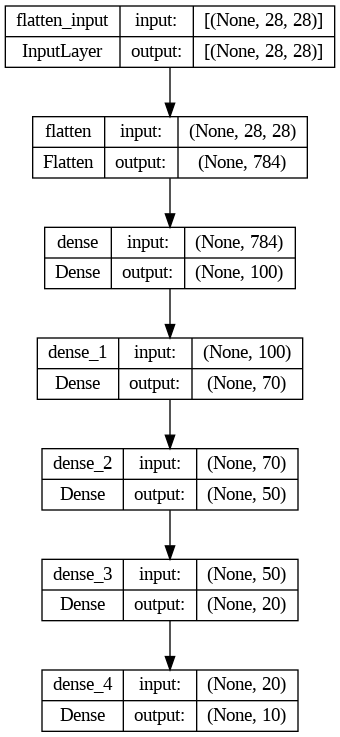

In [ ]:
#Visualizing model
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True)

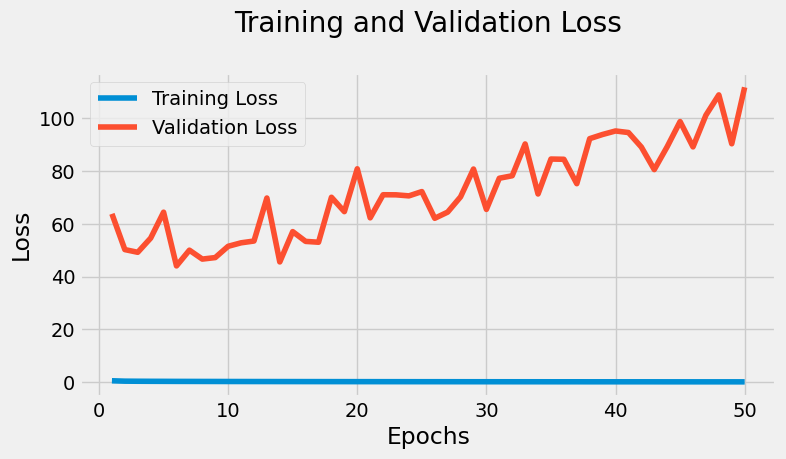

In [ ]:
plt.figure(figsize = (8, 4))
plt.style.use('fivethirtyeight')

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epoch = range(1, 51)
sns.lineplot(x=epoch, y=train_loss, label='Training Loss')
sns.lineplot(x=epoch, y=val_loss, label='Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

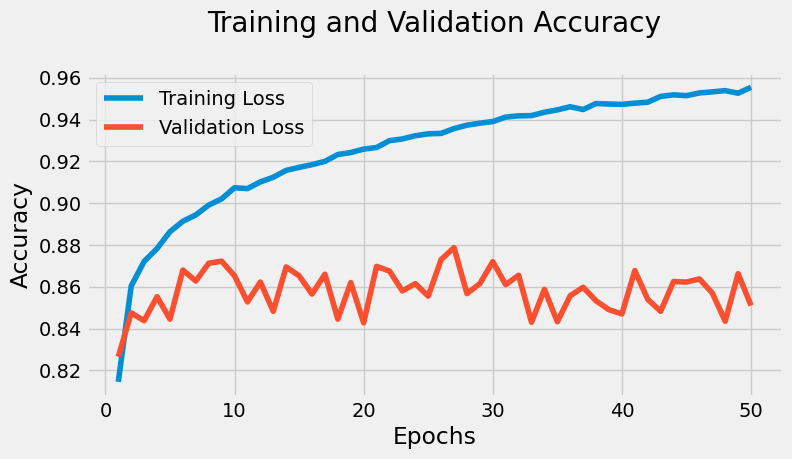

In [ ]:
#Visualizing Training and Validation accuracy
plt.figure(figsize = (8, 4))

train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy']
epoch = range(1, 51)
sns.lineplot(x=epoch, y=train_loss, label='Training Loss')
sns.lineplot(x=epoch, y=val_loss, label='Validation Loss')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# making predictions
y_probs = model.predict(X_test)
y_preds = y_probs.argmax(axis = 1)

y_preds[:100]

313/313 [==============================] - 1s 4ms/step


array([9, 2, 1, 1, 0, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 2, 5,
       7, 5, 1, 2, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7,
       6, 7, 2, 1, 2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1,
       0, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 0, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2])

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
    # Generate a random index within the range of available images
    i = random.randint(0, len(images) - 1)

    # Select the target image
    target_image = images[i]

    # Reshape the image to match the input shape expected by the model
    target_image_reshaped = tf.reshape(target_image, (1, 28, 28))

    # Predict the label probabilities for the target image
    pred_probs = model.predict(target_image_reshaped)

    # Determine the predicted and true labels
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the target image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Determine the color of the label text based on whether the prediction is correct
    if pred_label == true_label:
        label_color = "green"
    else:
        label_color = "red"

    # Add a label indicating the prediction and true label to the plot
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                      100 * tf.reduce_max(pred_probs),
                                                      true_label),
                                                      color=label_color)

# Example usage:
# plot_random_image(model, X_test, y_test, class_names)

1/1 [==============================] - 0s 90ms/step


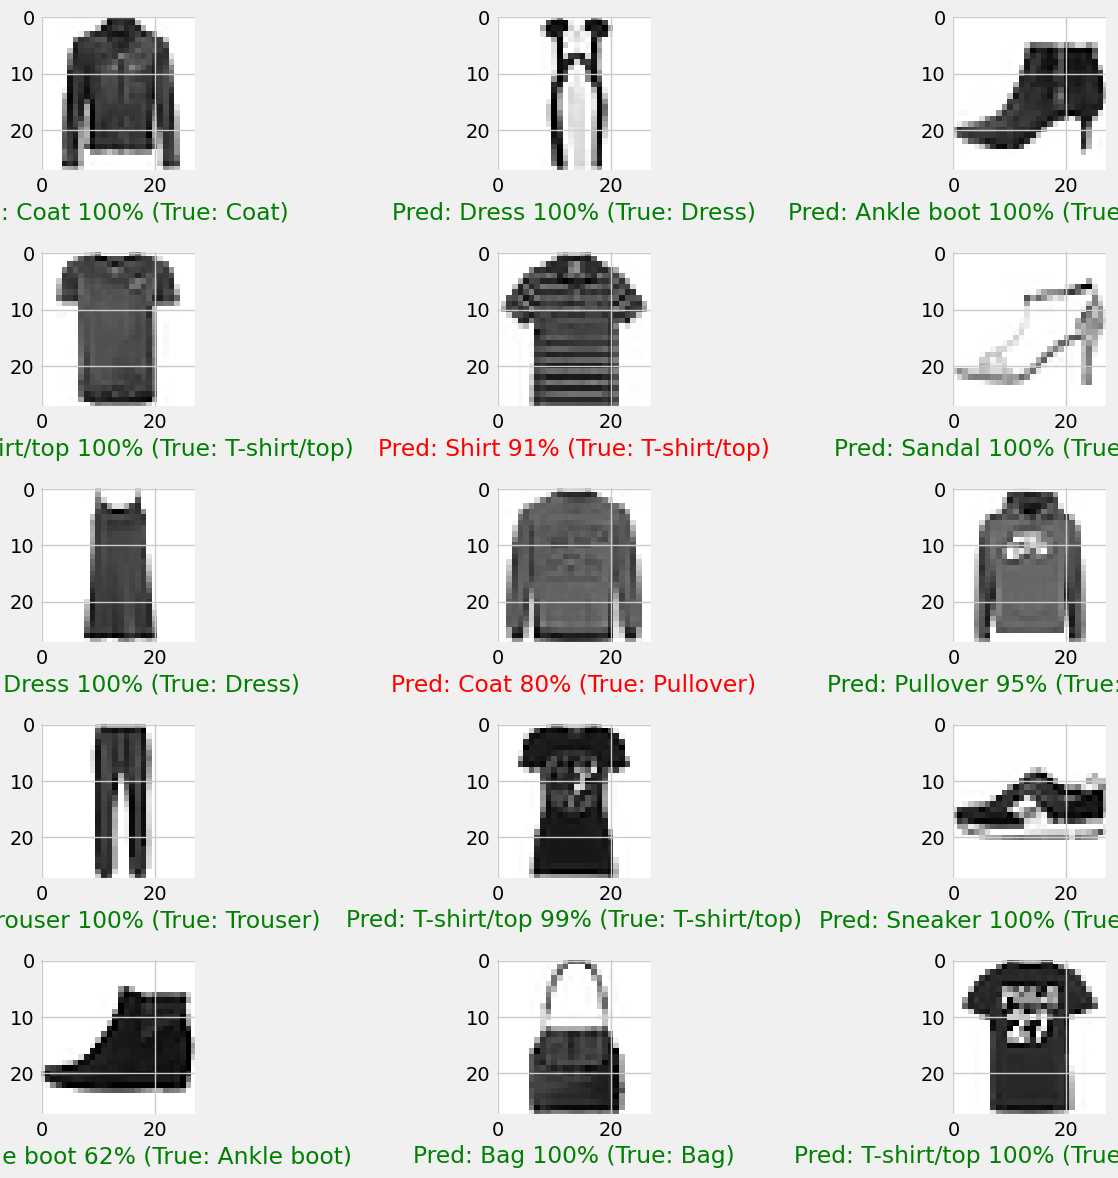

In [ ]:
#Looking at some Random Predictions
plt.figure(figsize = (16, 12))
plotnumber = 1

for i in range(15):
    if plotnumber <= 15:
        ax = plt.subplot(5, 3, plotnumber)
        plot_random_image(model=model,
                  images=X_test,
                  true_labels=y_test,
                  classes=class_names)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
#Use the Model to Make Predictions
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 21ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.89, 0.  , 0.11, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.52, 0.  , 0.  , 0.  , 0.  , 0.  , 0.48, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
# Assuming model.predict(X_new) returns the probabilities for each class
y_pred_probabilities = model.predict(X_new)

# Get the predicted class for each sample
y_pred = np.argmax(y_pred_probabilities, axis=1)

1/1 [==============================] - 0s 20ms/step


In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'T-shirt/top'],
      dtype='<U11')

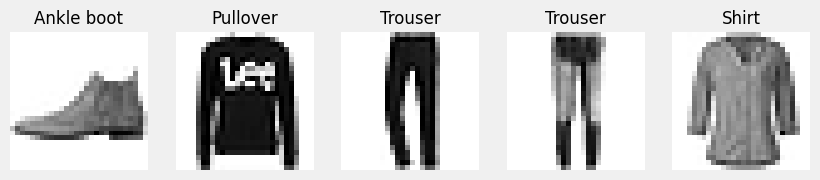

In [ ]:
y_new = y_test[:5]
plt.figure(figsize=(9.2, 4.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()